In [ ]:
# model evaluation, evaluation procedure
# accuracy use, and limitation
# confusion matrix
# metrics linked to CM
# classify performance
# ROC curve
# AUC vs Accuracy

In [7]:
import pandas as pd
pima = pd.read_csv(r'C:\Users\Mfornaroli\Desktop\pima-indians-diabetes.csv')
pima.head()
# data.columns
# label = 1 >> the patient has diabetes

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label']

In [21]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred_class = logreg.predict(X_test)

In [24]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


In [27]:
# we should compare it with null accuracy (always predicting most frequent class)
print(y_test.value_counts())
print(y_test.mean())  # 67% of observations are zeros
print(1-y_test.mean())

0    130
1     62
Name: label, dtype: int64
0.3229166666666667
0.6770833333333333


In [38]:
print('true      : ',y_test.values[0:25])
print('predicted : ', y_pred_class[0:25])

true      :  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
predicted :  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [39]:
# confusion matrix available in metrics module, man!
print(metrics.confusion_matrix(y_test, y_pred_class)) # true value first

[[118  12]
 [ 47  15]]


In [40]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [41]:
print((FP + FN)/float(TN+TP+FP+FN))
print(1-metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [44]:
# print(dir(metrics)) allows you to check all methods inside metrics
print(TP/float(TP+FN))  # sensitivity to positive instances / recall
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [46]:
print(TP/float(TP+FP))   # precision
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


In [49]:
print(logreg.predict(X_test)[0:10])
print(logreg.predict_proba(X_test)[0:10,:])
#probability that a certain element will have diabetes or not, according to the model
# two cols because there are 2 possible response classes!

[0 0 0 0 0 0 0 1 0 1]
[[0.63247571 0.36752429]
 [0.71643656 0.28356344]
 [0.71104114 0.28895886]
 [0.5858938  0.4141062 ]
 [0.84103973 0.15896027]
 [0.82934844 0.17065156]
 [0.50110974 0.49889026]
 [0.48658459 0.51341541]
 [0.72321388 0.27678612]
 [0.32810562 0.67189438]]


In [54]:
y_pred_prob = logreg.predict_proba(X_test)[:,1] # storing probabilities of having diabetes

In [ ]:
# default: threshold for classification is 50%. but we can change it. 
# we could contact the patients only in case prob of having diabetes > 90%

In [55]:
y_pred_prob

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438,
       0.35755557, 0.74087965, 0.36050235, 0.23012363, 0.42654231,
       0.19103515, 0.45763601, 0.1190141 , 0.43928953, 0.36961151,
       0.44187989, 0.37611662, 0.19816022, 0.41677304, 0.15548281,
       0.2531671 , 0.09743077, 0.69633712, 0.15358309, 0.2197836 ,
       0.43094832, 0.34216058, 0.22396114, 0.38073543, 0.13342134,
       0.38790216, 0.47049703, 0.16204743, 0.29548176, 0.30918161,
       0.27299705, 0.38816583, 0.27353443, 0.28881041, 0.63471914,
       0.02365251, 0.15820648, 0.23018375, 0.3484593 , 0.27580041,
       0.33264104, 0.24880596, 0.74489512, 0.39001464, 0.41625545,
       0.13575687, 0.18895376, 0.64777682, 0.18922131, 0.05685904,
       0.63991547, 0.46636382, 0.1250972 , 0.26957602, 0.24919104,
       0.30570396, 0.46376224, 0.20963095, 0.42847829, 0.40762264,
       0.20169096, 0.27027066, 0.26255856, 0.57238263, 0.45467

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=14

Text(0,0.5,'frequency')

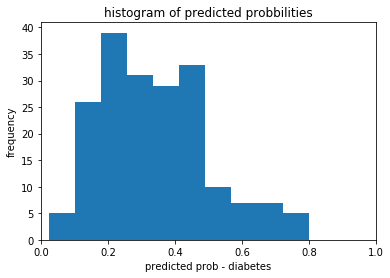

In [62]:
plt.hist(y_pred_prob, bins=10)
plt.xlim(0,1)
plt.title('histogram of predicted probbilities')
plt.xlabel('predicted prob - diabetes')
plt.ylabel('frequency')

In [64]:
from sklearn.preprocessing import binarize
# lowering the threshold to 30%
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [65]:
y_pred_prob[0:10]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [66]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [67]:
print(confusion)

[[118  12]
 [ 47  15]]


In [70]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


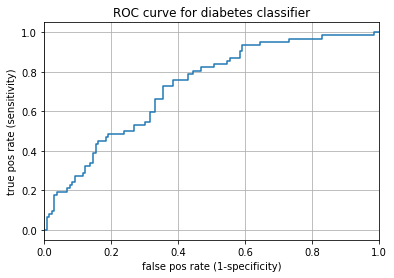

In [72]:
# optimal threshold. helps us to choose (...)
# check how sensitivity and specificity are affected: ROC curve!
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('false pos rate (1-specificity)')
plt.ylabel('true pos rate (sensitivity)')
plt.grid()